# Predicting Car Prices

In this project I will use the k-nearest neighbors technique and the machine learning workflow to predict a car's market price based on its features or attributes. 

In [594]:
# reading in the dataframe
import pandas as pd
import numpy as np
cols = ['symboling', 'normalized_losses', 'make', 'fuel-type', 'aspiration', 'num_doors', 'body-style', 'drive-wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cars = pd.read_csv("imports-85.data", names=cols)
pd.options.display.max_columns = None
cars.head()

,symboling,normalized_losses,make,fuel-type,aspiration,num_doors,body-style,drive-wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Cleaning the data

In [595]:
# select columns with continuous values
continuous_values_cols = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size',
                          'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
numeric_cars = cars[continuous_values_cols]
numeric_cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [596]:
# replace ? values with nan
numeric_cars = numeric_cars.replace('?', np.nan)

In [597]:
# convert coulumns that contained "?" from object to numeric data types
numeric_cars = numeric_cars.astype("float")

In [598]:
# check for missing values
numeric_cars.isnull().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [599]:
# We want to predict price, but four rows do not contain values for price, so we will drop these rows
numeric_cars = numeric_cars.dropna(subset = ['price'])
numeric_cars.isnull().sum()

normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [600]:
# use averages to replace other missing values
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()


normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [601]:
# normalize the columns so that all values range from 0 to 1, except for the price (target) column
price_col = numeric_cars['price']
numeric_cars=(numeric_cars-numeric_cars.min())/(numeric_cars.max()-numeric_cars.min())
numeric_cars['price'] = price_col
numeric_cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


# Univariate Model

In [602]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    
    # Randomize order of rows in data frame
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)

    # Create 80/20 split for train/test sets
    last_train_row = int(len(random_df) * .8)
    # Select the first 80% and set as training set
    # Select the second 20% and set as test set
    train_df = random_df.iloc[0:last_train_row]
    test_df = random_df.iloc[last_train_row:]
    
    #instantiate the knn regressor class
    knn = KNeighborsRegressor()
    
    # Fit a KNN model using default k value
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model
    predictions = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    return rmse

rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# train a model for each column (except 'price'), return rmse value,
# and add to rmse_results dictionary

for col in train_cols:
    rmse_value = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_value
    
# create a Series object from the dictionary to easily 
# view results and sort etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()


engine_size          3165.411107
curb_weight          3542.232504
city_mpg             4004.261065
width                4289.527858
highway_mpg          4425.000532
wheel_base           4692.348776
horsepower           5037.249086
length               5776.389428
compression_ratio    5823.942730
peak_rpm             7039.661065
height               7114.466472
normalized_losses    7312.839939
stroke               8509.786245
bore                 8570.096664
dtype: float64

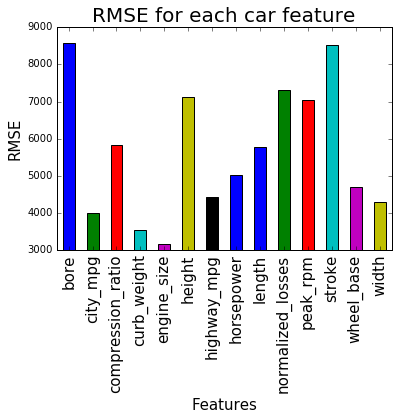

In [603]:
# visualize the results
import matplotlib.pyplot as plt
%matplotlib inline

rmse_results_series.plot(kind="bar")
plt.xticks(rotation=90, size=15)
plt.ylim(3000, 9000)
plt.ylabel("RMSE", size=15)
plt.xlabel("Features", size=15)
plt.title("RMSE for each car feature", size=20)

# Update model to accept a parameter for k value

In [604]:
def knn_train_test(train_col, target_col, df):
    
    # Randomize order of rows in data frame
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)

    # Create 80/20 split for train/test sets
    last_train_row = int(len(random_df) * .8)
    # Select the first 80% and set as training set
    # Select the second 20% and set as test set
    train_df = random_df.iloc[0:last_train_row]
    test_df = random_df.iloc[last_train_row:]
    
    # add parameters for k value
    k_values = [1, 3, 5, 7, 9]
    k_rmses = {}
    
    # loop over k parameters
    for k in k_values:
        # instantiate the knn regressor class
        knn = KNeighborsRegressor(n_neighbors=k)
        # Fit a KNN model using k nearest neighbors
        knn.fit(train_df[[train_col]], train_df[target_col])
        # Make predictions using model
        predictions = knn.predict(test_df[[train_col]])
        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# train a model for each column (except 'price'), return rmse value,
# and add to rmse_results dictionary

for col in train_cols:
    rmse_value = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_value
    
k_rmse_results
    



{'bore': {1: 11325.623045371662,
  3: 11020.816129115008,
  5: 8570.096663996499,
  7: 8365.797896227094,
  9: 8775.94193557989},
 'city_mpg': {1: 4974.416639409995,
  3: 3928.700182242369,
  5: 4004.261065171548,
  7: 4081.310648036243,
  9: 4339.190601157172},
 'compression_ratio': {1: 7799.828345515829,
  3: 6163.730431482084,
  5: 5823.942730470903,
  7: 6157.7248722066115,
  9: 6407.497099828602},
 'curb_weight': {1: 4185.38209637817,
  3: 3865.4854755980678,
  5: 3542.232503971912,
  7: 3648.8946863476,
  9: 3902.9189076894745},
 'engine_size': {1: 3408.2198056907127,
  3: 2922.210479074161,
  5: 3165.4111068109232,
  7: 3075.289045001077,
  9: 3146.558145913208},
 'height': {1: 6148.6606790699925,
  3: 7574.277044037761,
  5: 7114.46647188053,
  7: 7059.4162099980385,
  9: 7112.208123377993},
 'highway_mpg': {1: 6099.731359538433,
  3: 4905.003872215584,
  5: 4425.000531789963,
  7: 4250.7808647564025,
  9: 4668.313503523361},
 'horsepower': {1: 3403.51650646153,
  3: 4619.27625

/dataquest/system/env/python3/lib/python3.4/site-packages/matplotlib/axes/_axes.py:519: UserWarning:

No labelled objects found. Use label='...' kwarg on individual plots.



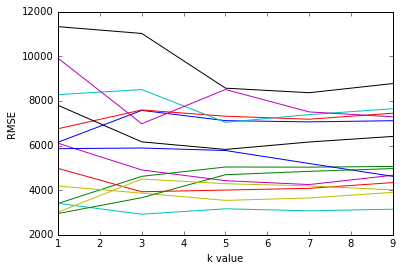

In [605]:
# visualize the results
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x, y = zip(*sorted(v.items()))
    
    plt.plot(x,y)
    plt.xlabel("k value")
    plt.ylabel("RMSE")
    plt.legend()


# Multivariate Model

In [606]:
def knn_multivar_test(features, target_col, df):

    # Randomize order of rows in data frame
    np.random.seed(1)
    shuffled_index = np.random.permutation(numeric_cars.index)
    random_df = numeric_cars.reindex(shuffled_index)

    # Create 80/20 split for train/test sets
    last_train_row = int(len(random_df) * .8)
    # Select the first 80% and set as training set
    # Select the second 20% and set as test set
    train_df = random_df.iloc[0:last_train_row]
    test_df = random_df.iloc[last_train_row:]

    # instantiate the knn regressor class
    knn = KNeighborsRegressor()

    # Fit a KNN model using default k value
    knn.fit(train_df[features], train_df[target_col])

    # Make predictions using model
    prediction = knn.predict(test_df[features])

    # Calculate and return RMSE
    mse = mean_squared_error(test_df[target_col], prediction)
    rmse = np.sqrt(mse)
    return rmse
    

# two-five best features, and all features
two_features = ['engine_size', 'horsepower']
three_features = ['engine_size', 'horsepower', 'curb_weight']
four_features = ['engine_size', 'horsepower', 'curb_weight', 'highway_mpg']
five_features = ['engine_size', 'horsepower', 'curb_weight', 'highway_mpg', 'width']
all_features = ['bore', 'city_mpg', 'compression_ratio', 'curb_weight',
                'engine_size', 'height', 'highway_mpg', 'horsepower', 'length', 'normalized_losses',
                'peak_rpm', 'stroke', 'wheel_base', 'width']

# use function to calculate rmse on 2-5 features as well as all features
rmse_two_features = knn_multivar_test(two_features, 'price', numeric_cars)
rmse_three_features = knn_multivar_test(three_features, 'price', numeric_cars)
rmse_four_features = knn_multivar_test(four_features, 'price', numeric_cars)
rmse_five_features = knn_multivar_test(five_features, 'price', numeric_cars)
all_features_rmse = knn_multivar_test(all_features, 'price', numeric_cars)

print("RMSE for two best features: {}".format(rmse_two_features))
print("RMSE for three best features: {}".format(rmse_three_features))
print("RMSE for four best features: {}".format(rmse_four_features))
print("RMSE for five best features: {}".format(rmse_five_features))
print("RMSE for all features: {}".format(all_features_rmse))


RMSE for two best features: 2929.4280152591846
RMSE for three best features: 2726.022317429179
RMSE for four best features: 2673.5462017109276
RMSE for five best features: 2507.1095221584483
RMSE for all features: 2776.86026524255


(2000, 3000)

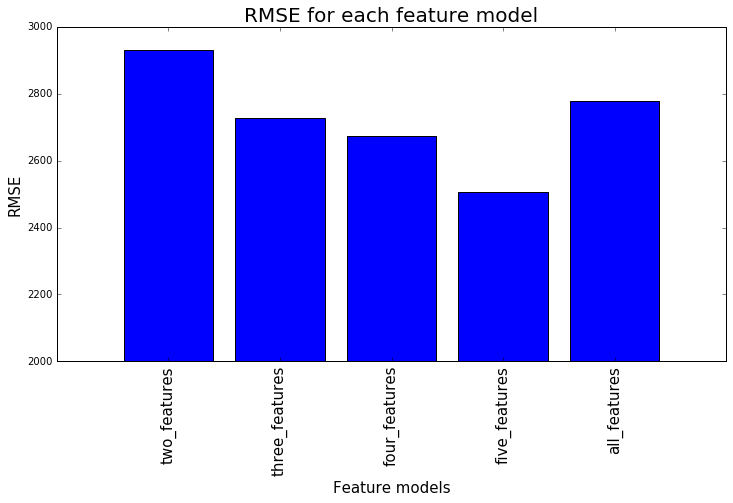

In [607]:
# visualize feature model rmses with bar chart
labels = ["two_features", "three_features", "four_features",
                "five_features", "all_features"]
rmse_models = [rmse_two_features, rmse_three_features, rmse_four_features,
              rmse_five_features, all_features_rmse]


plt.figure(figsize=(12,6))

plt.bar(range(5), rmse_models, align='center')
plt.ylabel("RMSE", size=15)
plt.xlabel("Feature models", size=15)
plt.title("RMSE for each feature model", size=20)
plt.xticks(range(5), labels, rotation=90, size=15)
plt.ylim(2000, 3000)





The five feature model (engine size, horsepower, curb weight, highway mpg, width) has the lowest error (rmse) thus far. Now I will use hyperparameter optimization (finding the best number of neighbors) to see if I can lower the error value even further. 

# Hyperparameter Optimization
I will vary the hyperparameter value from 1-25 for each of the top 3 models in the prior step, and plot the resulting RMSE values.

In [608]:
def knn_multivar_hyperparam_test(features, target_col, df, k_num):

    # Randomize order of rows in data frame
    np.random.seed(1)
    shuffled_index = np.random.permutation(numeric_cars.index)
    random_df = numeric_cars.reindex(shuffled_index)

    # Create 80/20 split for train/test sets
    last_train_row = int(len(random_df) * .8)
    # Select the first 80% and set as training set
    # Select the second 20% and set as test set
    train_df = random_df.iloc[0:last_train_row]
    test_df = random_df.iloc[last_train_row:]
    
    # instantiate the knn regressor class
    knn = KNeighborsRegressor(n_neighbors=k_num, algorithm="brute")
    # Fit a KNN model 
    knn.fit(train_df[features], train_df[target_col])
    # Make prediction using model
    prediction = knn.predict(test_df[features])
    # Calculate mse and rmse
    mse = mean_squared_error(test_df[target_col], prediction)
    rmse = np.sqrt(mse)
    return rmse
    
k_nums = [k for k in range(1,26)]    

top_three_features = {} 
top_four_features = {}
top_five_features = {}

# Apply function to top three models
for k in k_nums:
    result = knn_multivar_hyperparam_test(three_features, 'price', numeric_cars, k)
    top_three_features[k] = result
for k in k_nums:    
    result = knn_multivar_hyperparam_test(four_features, 'price', numeric_cars, k)
    top_four_features[k] = result
for k in k_nums:    
    result = knn_multivar_hyperparam_test(five_features, 'price', numeric_cars, k)
    top_five_features[k] = result

print(top_three_features) 
print(top_four_features)
print(top_five_features)

top_three_features.items()
print(min(top_three_features.items(), key=lambda x: x[1]))
top_four_features.items()
print(min(top_four_features.items(), key=lambda x: x[1]))
top_five_features.items()
print(min(top_five_features.items(), key=lambda x: x[1]))

{1: 2139.4365852810465, 2: 2840.3062742787647, 3: 2765.7393195563163, 4: 2748.67567918248, 5: 2725.029468088597, 6: 2686.5337357923004, 7: 2764.0042907461843, 8: 2861.2537292594693, 9: 3124.8856331737225, 10: 3250.286734218097, 11: 3353.036762930252, 12: 3388.227950114583, 13: 3345.5266283693795, 14: 3506.1630545522294, 15: 3604.814117673896, 16: 3648.6367557878348, 17: 3778.5998807525957, 18: 3761.320994372058, 19: 3750.5675506375223, 20: 3779.5765656095496, 21: 3861.980882058926, 22: 3940.130545186577, 23: 4023.4987699789053, 24: 4085.0841278119124, 25: 4100.3814908300255}
{1: 1923.9974075840757, 2: 2288.0164124539265, 3: 2399.270712931231, 4: 2487.9200368492748, 5: 2671.410735374321, 6: 2743.6822533937993, 7: 2745.751980020947, 8: 2909.7852506723734, 9: 3102.6610755566207, 10: 3228.027004224097, 11: 3403.198607833816, 12: 3562.285053159857, 13: 3565.3313026609685, 14: 3574.4232785709983, 15: 3643.174241083496, 16: 3693.822661745078, 17: 3836.750263452122, 18: 3813.729859011886, 19: 

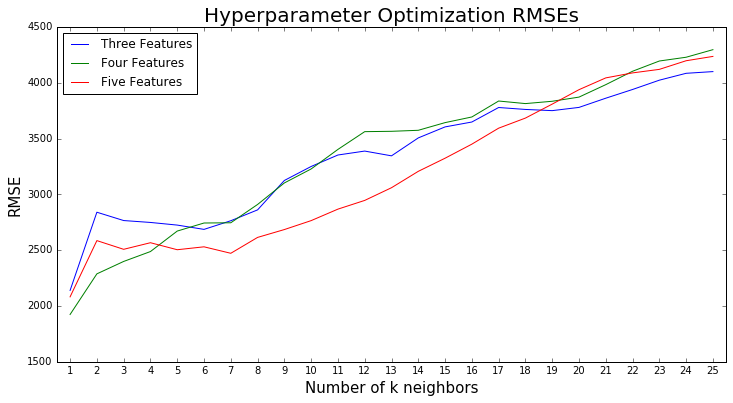

In [609]:
# visualize the results
plt.figure(figsize=(12,6))

plt.plot(list(top_three_features.keys()), list(top_three_features.values()), label = "Three Features")
plt.plot(list(top_four_features.keys()), list(top_four_features.values()), label = "Four Features")
plt.plot(list(top_five_features.keys()), list(top_five_features.values()), label = "Five Features")
plt.legend(loc='best')
plt.xticks(range(1,26))
plt.xlim(0.5,25.5)
plt.ylabel("RMSE", size=15)
plt.xlabel("Number of k neighbors", size=15)
plt.title("Hyperparameter Optimization RMSEs", size=20)



As the above chart displays, the top three models perform best--have the lowest rmses--with k=1 hyperparameter. In other words, they work best with only 1 nearest neighbor. The best model includes four features(attributes): engine size, horsepower, curb weight, and highway mpg. Moreover, using hyperparameter optimization resulted in the four-feature model rather than the five-feature model having the lowest rmse, and also lowered the rmse substantially, from about 2500 to 1924. 

The final step of the project involves testing the model's accuracy for prediction using untrained data in a more robust way than simple train/test validation. This allows me to better test how accurately the model will perform in practice, with independent (untrained) data. For this I will use k-fold cross validation. While train/test and holdout validation utilize only half the data for train/test purposes and therefore are biased towards those subsets of the data, k fold cross validation rotates through different subsets of the data to avoid this bias. This results in a more robust validation measure. The basic process for k fold cross validation is as follows:

1. split the full dataset into k equal length subsets
2. select k-1 subsets as the training set and
    select the remaining subset as the test set
3. train the model on the training set.
4. use the trained model to predict labels on the test fold.
5. calculate the test fold's error metric.
6. repeat all of the above steps k-1 times, until each subset has been used      as the test set for an iteration.
7. calculate the mean of the k error values.

# K Fold Cross Validation

In [610]:
from sklearn.model_selection import cross_val_score, KFold
# create k fold cross validation function using 1 as optimal hyperparamter
# function will model 2-25 folds
def knn_kfolds_test(train_col, target_col, df, folds):
    for fold in num_folds:
        kf = KFold(folds, shuffle=True, random_state=1)
        model = KNeighborsRegressor(1)
        mses = cross_val_score(model, df[train_col], df[target_col],
                               scoring="neg_mean_squared_error", cv=kf)
        rmses = np.sqrt(np.absolute(mses))
        avg_rmse = np.mean(rmses)
        std_rmse = np.std(rmses)
        return rmses, avg_rmse, std_rmse

k_folds = list(range(2,26))
k_folds_mean = {}
k_folds_std = {}


# Apply function to k number of folds

for k in k_folds:
    result = knn_kfolds_test(four_features, 'price', numeric_cars, k)
    
    k_folds_mean[k] = result[1]
    k_folds_std[k] = result[2]
    

print(k_folds_mean)
print(k_folds_std)

# find lowest mean and std
k_folds_mean.items()
print(min(k_folds_mean.items(), key=lambda x: x[1]))
k_folds_std.items()
print(min(k_folds_std.items(), key=lambda x: x[1]))






    


{2: 3030.5248278672093, 3: 2522.8223645340126, 4: 2597.284351950644, 5: 2439.254972692088, 6: 2512.3519840635126, 7: 2440.7969486943794, 8: 2438.837870669518, 9: 2252.2596624454627, 10: 2332.745974977613, 11: 2250.416012914838, 12: 2290.081062122747, 13: 2294.9872252132136, 14: 2287.8692148630703, 15: 2244.4742421548967, 16: 2218.255529600091, 17: 2261.0722062792424, 18: 2249.422433975352, 19: 2287.0778821727713, 20: 2262.1110618267267, 21: 2150.4698784382817, 22: 2149.637066676481, 23: 2206.6511987111626, 24: 2200.8356914185824, 25: 2206.2747003713703}
{2: 82.71378066625266, 3: 205.63384256006634, 4: 440.9793343770381, 5: 354.0876927719042, 6: 341.0933081033041, 7: 452.98678483567835, 8: 613.9998272767381, 9: 731.7555842324936, 10: 615.8885994561275, 11: 775.1381990425928, 12: 811.9555387590236, 13: 842.8929256940514, 14: 811.1927234593533, 15: 892.3046064744012, 16: 926.6382207622704, 17: 961.3739890371608, 18: 984.487108461587, 19: 782.7313141547418, 20: 871.6441704447133, 21: 1011.

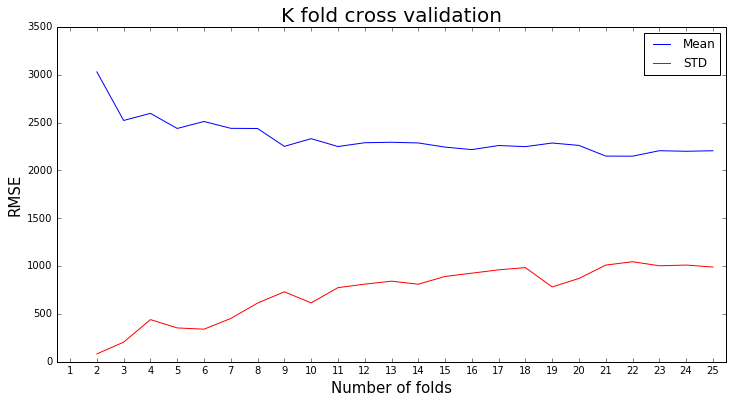

In [611]:
# visualize the results
plt.figure(figsize=(12,6))

plt.plot(list(k_folds_mean.keys()), list(k_folds_mean.values()), label = "Mean")

plt.plot(list(k_folds_std.keys()), list(k_folds_std.values()), label = "STD", color='red')
plt.legend(loc='best')
plt.xticks(range(1,26))
plt.xlim(0.5,25.5)
plt.ylabel("RMSE", size=15)
plt.xlabel("Number of folds", size=15)
plt.title("K fold cross validation", size=20)

A model contains two types of error: bias, which indicates how accurately the model predicts the target; and variance, which describes the variability of the model's predicted values. There is a trade-off between the two types of error, so we must choose a point at which there is a reasonable balance between the two. The above chart indicates that 9 folds gives a good balance between a low mean rmse and low standard deviation. 

# Conclusion
This project used the k nearest neighbors technique and a machine learning workflow to predict what features (attributes) best contribute to a car's price. To begin there were 25 predictive features in the dataset; after removing those that were not continues variables, I was left with 14 features. I found that a model of four features--engine size, horsepower, curb weight, and highway mpg--best predicted a car's price. This model was able to predict a price within $ 1924. I then used the k fold cross validation technique as a more robust test of how the model would perform using untrained, independent data. For this I was able to obtain a root mean square error value of 2149 with a standard deviation of 83, which seems reasonably close to the best prediction using train/test validation. 

This project demonstrates how to use a basic machine learning workflow for numeric data:
1. clean the data to extract continuous numeric data, remove extraneous columns, remove punctuation, convert data to float values, replace missing values, and normalize the data for analysis.
2. Create a prediction model by:
    a. selecting relevant features to use for predicting the target column.
    b. use grid search to find the optimal hyperparameter value for the selected features.
    c. evaluate the model's accuracy and repeat the process.

After cleaning the data, I created a univariate model. I then updated the model by adding a hyperparameter value. Next I created a multivariate model in order to lower the error/better predict the target. I then optimized the model by tuning the hyperparameter (number of nearest neighbors). Fianlly, I used k fold cross validation as a more robust test of how the model would perform using independent, untrained data.
